In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# CPH training

## How does Grid Search affect parameter weights?

In [99]:
def best_params(dir_name, split_num, experiment):
    mean_test = np.load(os.path.join(dir_name, "split{}".format(split_num), "hyperparameters", experiment + "_mean_test.npy"))
    best_idx = np.argmax(mean_test)
    penalizer = np.load(os.path.join(dir_name, "split{}".format(split_num), "hyperparameters", experiment + "_penalizer.npy"), allow_pickle=True)
    l1_ratio = np.load(os.path.join(dir_name, "split{}".format(split_num), "hyperparameters", experiment + "_l1_ratio.npy"), allow_pickle=True)
    return penalizer[best_idx], l1_ratio[best_idx]

In [128]:
def plot_coefficients_by_grid_settings(experiment):
    fig, axes = plt.subplots(5, 1, figsize=(10,30))
    fig.tight_layout(h_pad=12.0)

    title = "CPH coefficients by Grid Search Settings"
    for i in range(5):
        dir_name = "training_runs/original_grid_settings"
        with open(os.path.join(dir_name, "split{}/{}_cph.pickle".format(i, experiment)), "rb") as f:
            cph_model = pickle.load(f)

        penalizer, l1_ratio = best_params(dir_name, i, experiment)
        label = "original grid search - best penalizer: {:.2f} l1_ratio: {}".format(penalizer, l1_ratio)

        feature_index = np.arange(len(cph_model.params_))
        axes[i].bar(feature_index-0.3, cph_model.params_, width=0.3, label=label)

        dir_name = "training_runs/more_granular_grid_search"
        with open(os.path.join(dir_name, "split{}/{}_cph.pickle".format(i, experiment)), "rb") as f:
            cph_model = pickle.load(f)

        penalizer, l1_ratio = best_params(dir_name, i, experiment)
        label = "dense grid search - best penalizer: {:.2f} l1_ratio: {}".format(penalizer, l1_ratio)

        axes[i].bar(feature_index+0, cph_model.params_, width=0.3, label=label)

        dir_name = "training_runs/0.0l1_ratio"
        with open(os.path.join(dir_name,"split{}/{}_cph.pickle".format(i, experiment)), "rb") as f:
            cph_model = pickle.load(f)

        penalizer, l1_ratio = best_params(dir_name, i, experiment)
        label = "penalizer only grid search - best penalizer: {:.2f} l1_ratio: {}".format(penalizer, l1_ratio)

        axes[i].bar(feature_index+0.3, cph_model.params_, width=0.3, label=label)

        axes[i].set_xticks(feature_index)
        axes[i].set_xticklabels(cph_model.summary.index, rotation=90)
        axes[i].set_title(title + " - Split {}".format(i))
        axes[i].set_ylabel("Coefficent Weights")
        axes[i].legend()

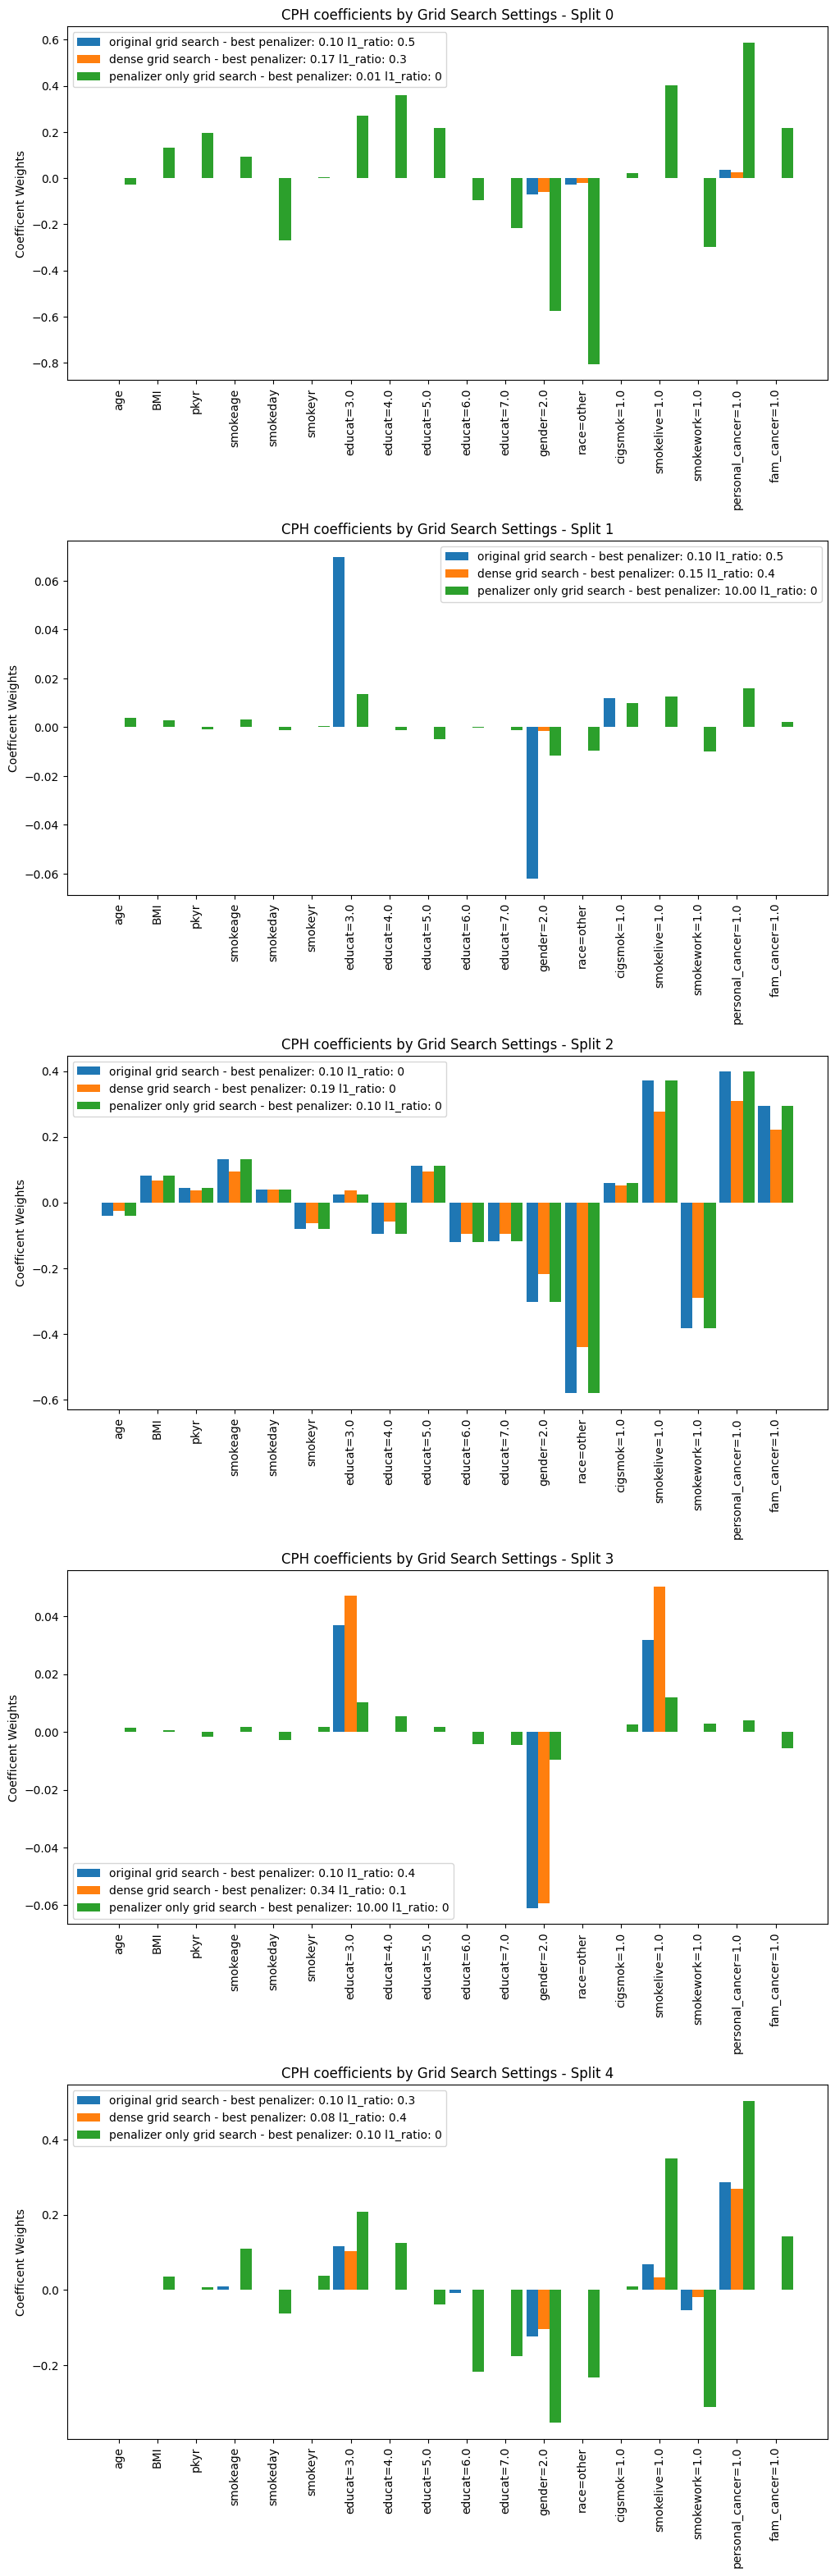

In [129]:
plot_coefficients_by_grid_settings("clinical")

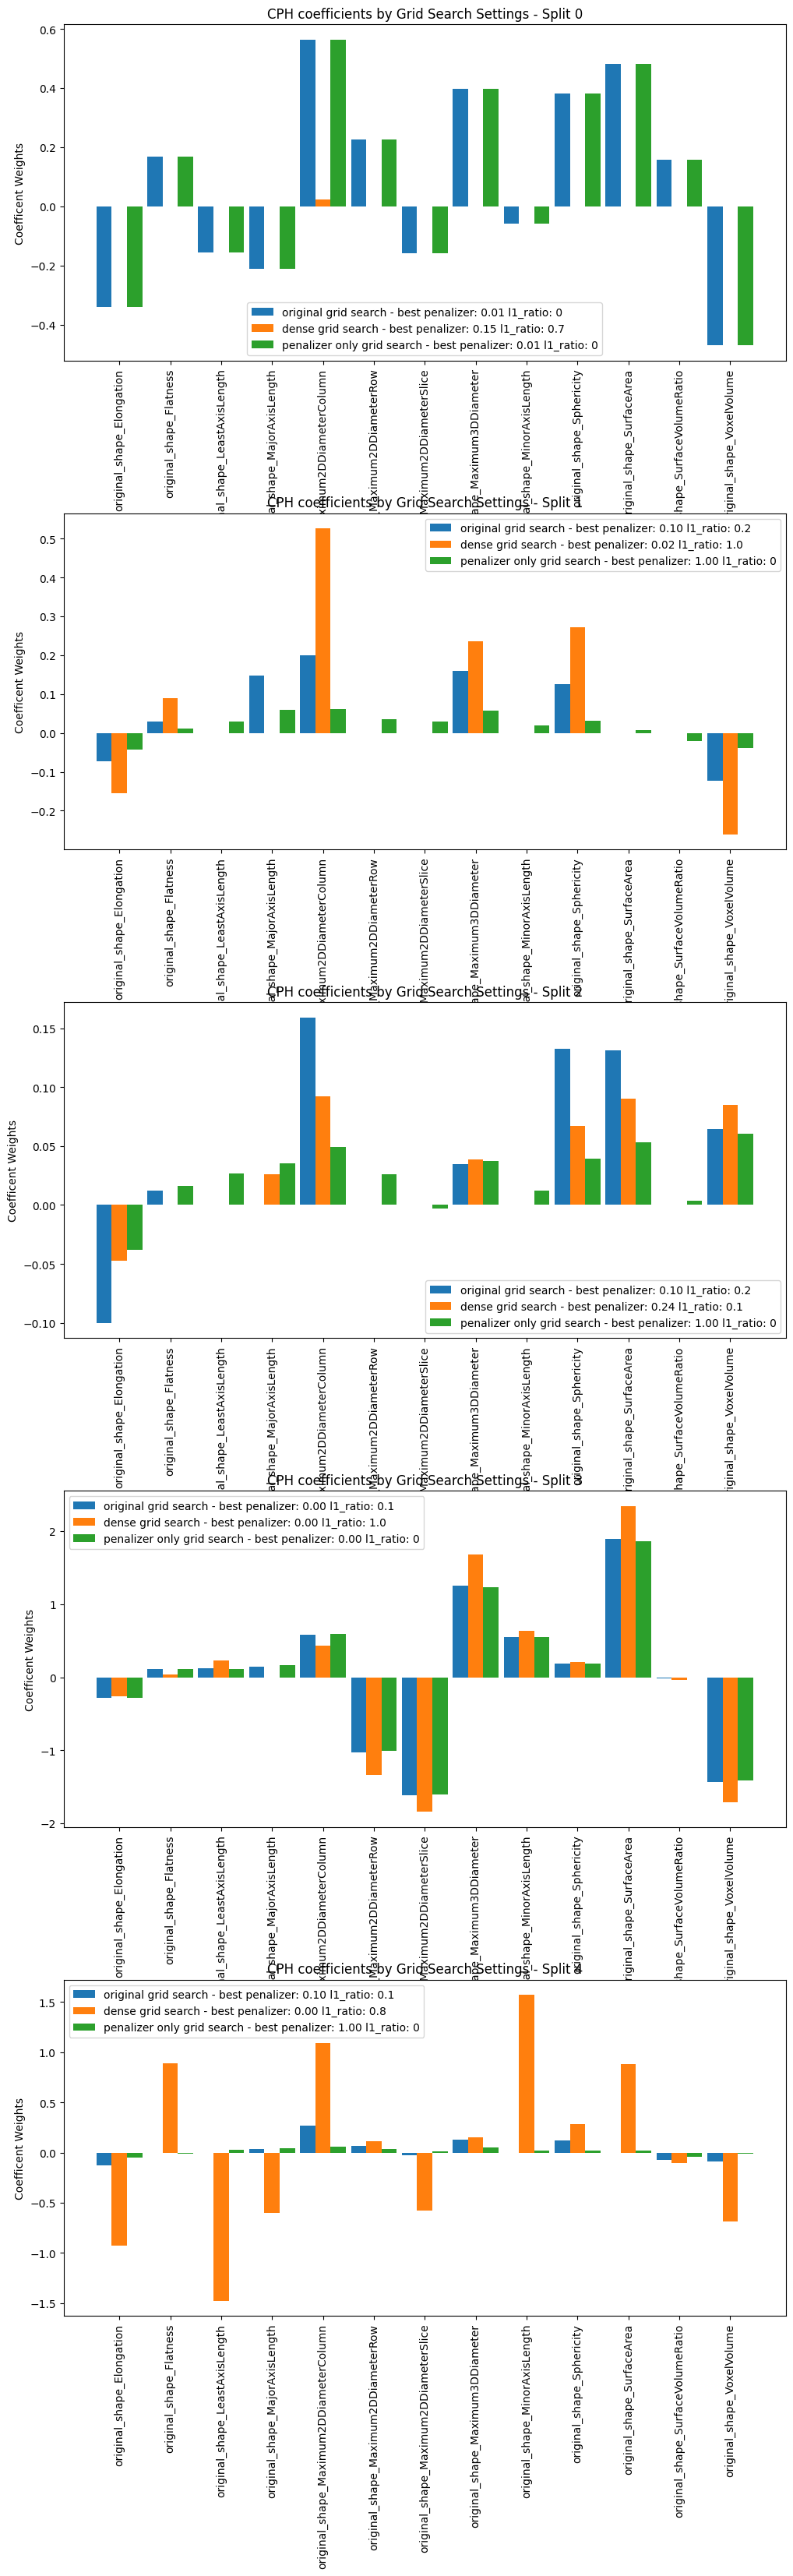

In [130]:
plot_coefficients_by_grid_settings("radiomics1")

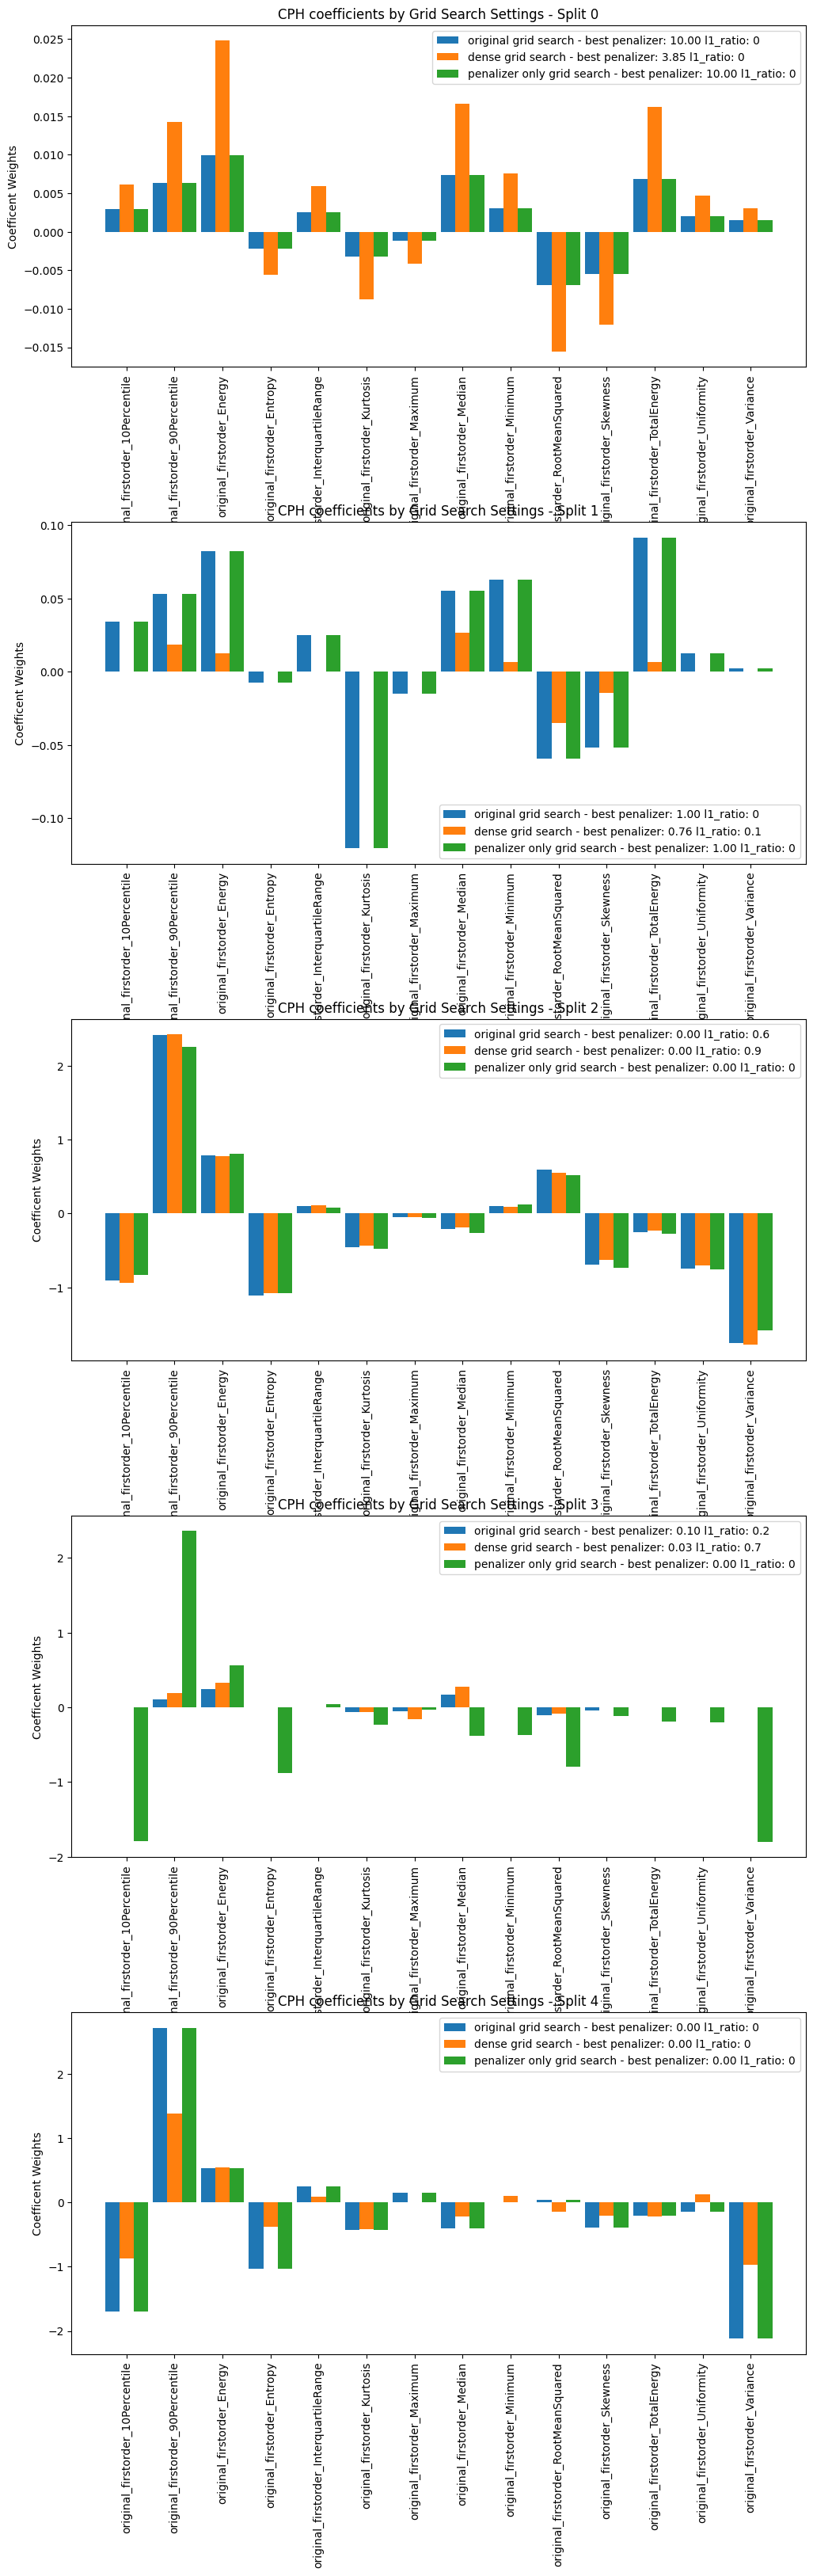

In [131]:
plot_coefficients_by_grid_settings("radiomics2")

# Visualize Grid Search

In [144]:
def visualize_grid_search(experiment, i): 
    dir_name = "training_runs/more_granular_grid_search"
    colors = ["red", "lightcoral", "darkorange", "gold", "yellowgreen", "green", "turquoise", "lightskyblue", "royalblue", "mediumpurple", "palevioletred"]

    fig, ax = plt.subplots(2, 1, figsize=(8,12))

    test_mean = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_mean_test.npy"))
    train_mean = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_mean_train.npy"))
    l1_ratio = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_l1_ratio.npy"), allow_pickle=True)
    penalizer = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_penalizer.npy"), allow_pickle=True)
    weight = []
    for p in penalizer:
        weight.append(float(p))
    weight = np.array(weight)

    max_test_index = np.argmax(test_mean)
    test_l1_ratio = l1_ratio[max_test_index]
    (test_color_idx,) = np.argwhere(np.unique(l1_ratio) == test_l1_ratio)
    ax[0].plot(penalizer[max_test_index], test_mean[max_test_index], '*', color=colors[test_color_idx[0]], \
               markersize=15)

    max_train_index = np.argmax(train_mean)
    train_l1_ratio = l1_ratio[max_train_index]
    (train_color_idx,) = np.argwhere(np.unique(l1_ratio) == train_l1_ratio)
    ax[1].plot(penalizer[max_train_index], train_mean[max_train_index], '*', color=colors[train_color_idx[0]], \
               markersize=15)

    for i, l1 in enumerate(np.unique(l1_ratio)):
        (indices, ) = np.where(l1_ratio == l1)
        ax[0].plot(weight[indices], test_mean[indices], '-', color=colors[i], label="l1 ratio: " + str(l1))
        ax[1].plot(weight[indices], train_mean[indices], '--', color=colors[i], label="l1 ratio: " + str(l1))

    ax[0].set_xscale('log')
    ax[0].grid()
    ax[0].legend(loc='lower right')
    ax[0].set_xlabel("penalizer")
    ax[0].set_ylabel("c index")
    ax[0].set_title(experiment + " test c index vs. penalizer for varying l1 ratios")

    ax[1].set_xscale('log')
    ax[1].grid()
    ax[1].legend(loc='upper right')
    ax[1].set_xlabel("penalizer")
    ax[1].set_ylabel("c index")
    ax[1].set_title(experiment + " train c index vs. penalizer for varying l1 ratios")

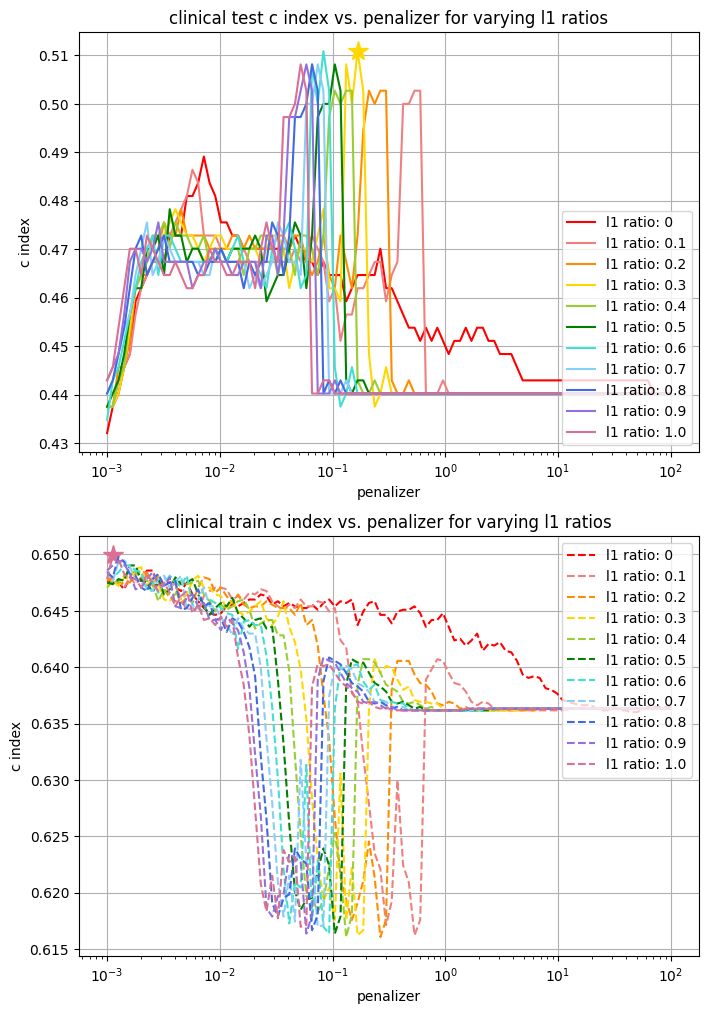

In [145]:
visualize_grid_search(experiment="clinical", i = 0) # i is split number)

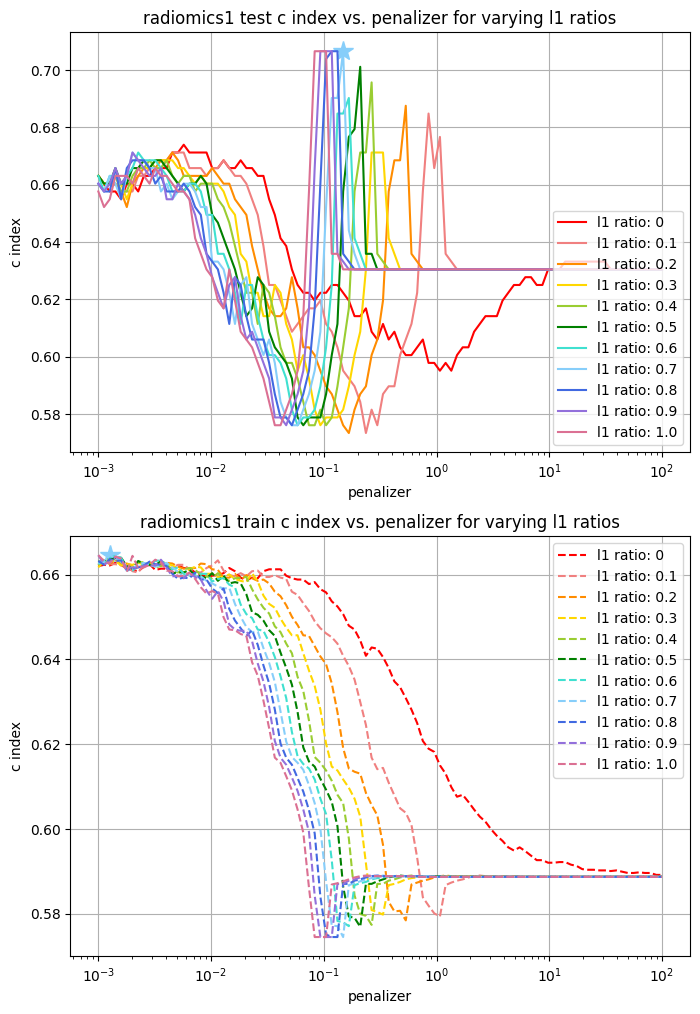

In [146]:
visualize_grid_search(experiment="radiomics1", i = 0) # i is split number)

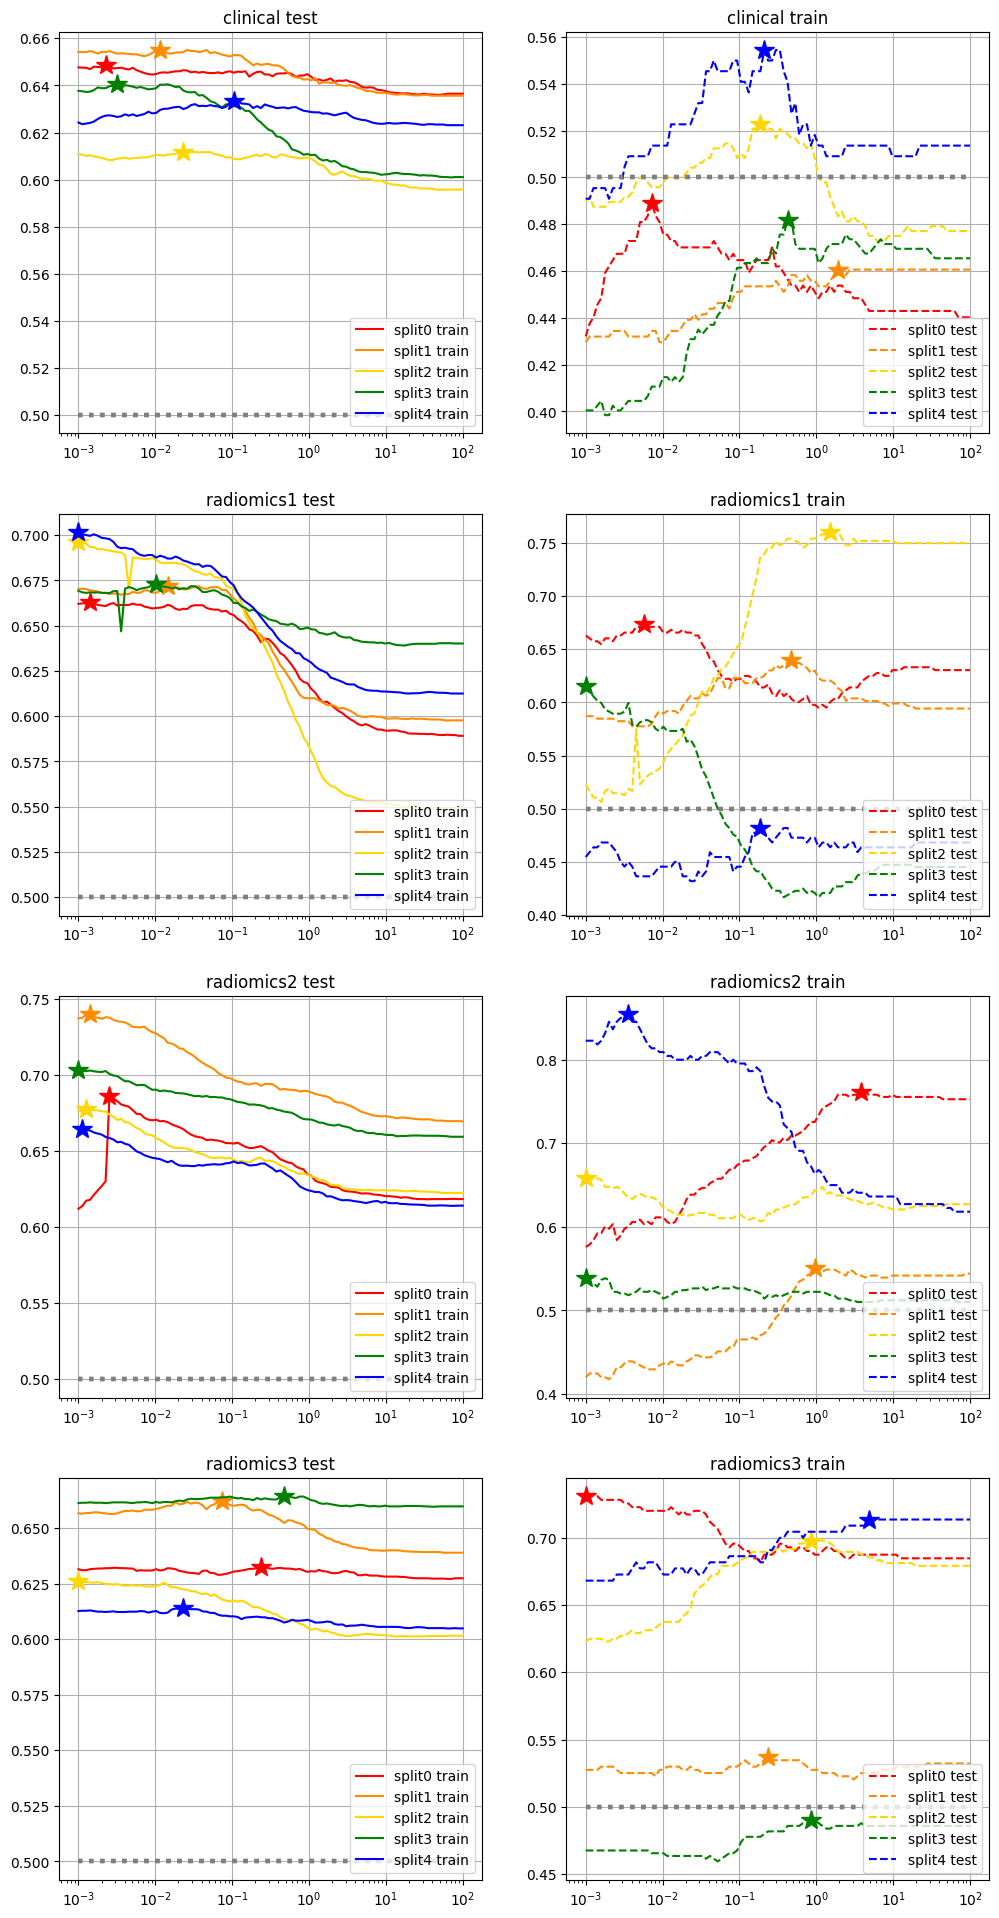

In [147]:
dir_name = "training_runs/more_granular_grid_search"
experiments = ["clinical", "radiomics1", "radiomics2", "radiomics3"]
colors = ["red", "darkorange", "gold", "green", "blue"]
l1 = 0.0

fig, axes = plt.subplots(4, 2, figsize=(12,24))

for j, experiment in enumerate(experiments):
    axes[j, 0].set_title(experiment + " test")
    axes[j, 1].set_title(experiment + " train")
    for i in range(5):
        test_mean = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_mean_test.npy"))
        train_mean = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_mean_train.npy"))
        l1_ratio = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_l1_ratio.npy"), allow_pickle=True)
        penalizer = np.load(os.path.join(dir_name, "split" + str(i), "hyperparameters", experiment + "_penalizer.npy"), allow_pickle=True)
        weight = []
        for p in penalizer:
            weight.append(float(p))
        weight = np.array(weight)
        (indices, ) = np.where(l1_ratio == l1)
        
        axes[j,0].plot(weight[indices], train_mean[indices], '-', color=colors[i], label="split{} train".format(i))
        axes[j,0].set_xscale('log')
        axes[j,0].grid()
        axes[j,0].legend(loc='lower right')
        axes[j,0].plot([weight[indices][0], weight[indices][-1]], [0.5, 0.5], ":", linewidth=3, color='gray')
        
        max_train_index = np.argmax(train_mean[indices])
        axes[j,0].plot(penalizer[indices][max_train_index], train_mean[indices][max_train_index], '*', color=colors[i], markersize=15)
        
        axes[j,1].plot(weight[indices], test_mean[indices], '--', color=colors[i], label="split{} test".format(i))
        axes[j,1].set_xscale('log')
        axes[j,1].grid()
        axes[j,1].legend(loc='lower right')
        axes[j,1].plot([weight[indices][0], weight[indices][-1]], [0.5, 0.5], ":", linewidth=3, color='gray')
        
        max_test_index = np.argmax(test_mean[indices])
        axes[j,1].plot(penalizer[indices][max_test_index], test_mean[indices][max_test_index], '*', color=colors[i], markersize=15)

# RSF training

In [ ]:
### WIP

dir_name = "run_with_original_grid_search"
colors = ["red", "lightcoral", "darkorange", "gold", "yellowgreen", "green", "turquoise", "lightskyblue", "royalblue", "mediumpurple", "palevioletred"]
experiment="clinical"
i = 3 #split number

fig, ax = plt.subplots(2, 1, figsize=(8,12))

test_mean = np.load(os.path.join(dir_name, "split" + str(i), "rsfhyperparameters", experiment + "_mean_test.npy"))
train_mean = np.load(os.path.join(dir_name, "split" + str(i), "rsfhyperparameters", experiment + "_mean_train.npy"))
min_samples_leaf = np.load(os.path.join(dir_name, "split" + str(i), "rsfhyperparameters", experiment + "_min_samples_leaf.npy"), allow_pickle=True)
min_samples_split = np.load(os.path.join(dir_name, "split" + str(i), "rsfhyperparameters", experiment + "_min_samples_split.npy"), allow_pickle=True)
n_estimators = np.load(os.path.join(dir_name, "split" + str(i), "rsfhyperparameters", experiment + "_n_estimators.npy"), allow_pickle=True)

print (np.unique(min_samples_leaf))
print (np.unique(min_samples_split))
print (np.meshgrid(np.unique(min_samples_leaf), np.unique(min_samples_split)))
for i, mesh in enumerate(np.meshgrid(np.unique(min_samples_leaf), np.unique(min_samples_split))):
    print (mesh)
    (leaf_indices, ) = np.where(min_samples_leaf == leaf)
    (split_indices, ) = np.where(min_samples_split == leaf)
    indices = np.in1d(leaf_indices, split_indices)
    print (leaf_indices)
    print (split_indices)
    print (indices)
    ax[0].plot(weight[indices], test_mean[indices], '-', color=colors[i], label="l1_ratio: " + str(l1) + " test")
    ax[0].set_xscale('log')
    ax[0].grid()
    ax[0].legend(loc='lower left')
    
    ax[1].plot(weight[indices], train_mean[indices], '--', color=colors[i], label=str(l1) + " train")
    ax[1].set_xscale('log')
    ax[1].grid()
    ax[1].legend(loc='lower left')